In [10]:
from sklearn.datasets import load_iris 
 
iris = load_iris()
X= iris.data
y= iris.target


In [11]:
import pandas as pd 

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["species"] = iris.target

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

steps = [
    ('scaler',StandardScaler()),
    (('logreg'),LogisticRegression(random_state=42))
]

pipeline = Pipeline(steps)

pipeline.fit(X_train,y_train)

,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true,y_pred,model_name="Model"):
    print(f"---{model_name}評価結果---")

    accuracy = accuracy_score(y_true,y_pred)
    print(f"精度(Accuracy):{accuracy:.4f}")

    cm =confusion_matrix(y_true,y_pred)
    print(f"\n混同行列:\n",cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False      
    )

    plt.title(f'{model_name}Confusion Matrix')
    plt.ylabel("Predict Label")
    plt.ylabel("True Label")
    plt.show

---Iris Logreg Pipeline評価結果---
精度(Accuracy):0.9333

混同行列:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


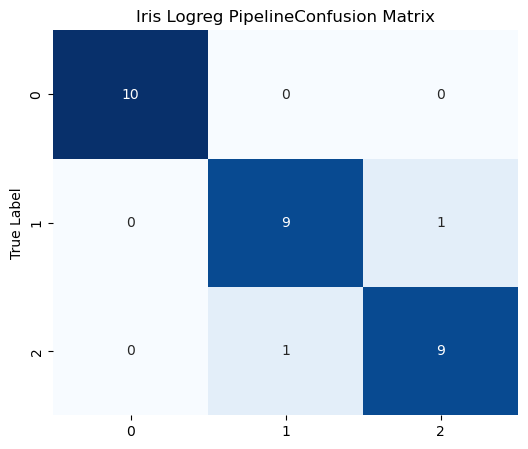

In [17]:
y_pred = pipeline.predict(X_test)
evaluate_model(y_test,y_pred,model_name="Iris Logreg Pipeline")